<h1>Introduction</h1>

*V1 (1/02/2017): Simple scatter plots, PCA, correlation matrix*

Planned:
<ul>
    <li>Choropleths</li>
    <li>Currency Strength Analysis</li>
    <li>Literacy</li>
</ul>

In [246]:
library(ggplot2)
library(reshape2)
library(ggcorrplot)
library(corrplot)

In [240]:
d <- read.csv('HDI_2014.csv', header=T, stringsAsFactors=FALSE)

# remove incomplete rows
rem <- d$GDI=='..'
d <- d[!rem,]

# remove commas from incomes
d[,12] <- gsub(',', '', d[,12])
d[,13] <- gsub(',', '', d[,13])

# convert characters to numerics
for (col in seq(3,13,1)){
    d[,col] <- as.numeric(d[,col])
}

colnames(d) <- c('Rank', 'Country', 'GDI', 'HDI.F', 'HDI.M', 'LE.F', 'LE.M',
                 'ES.F', 'ES.M', 'MS.F', 'MS.M', 'Inc.F', 'Inc.M')

head(d)

,Rank,Country,GDI,HDI.F,HDI.M,LE.F,LE.M,ES.F,ES.M,MS.F,MS.M,Inc.F,Inc.M
1,1,Norway,0.996,0.94,0.944,83.6,79.5,18.2,16.8,12.7,12.5,57140,72825
2,2,Australia,0.976,0.922,0.945,84.5,80.3,20.7,19.7,13.1,12.9,33688,50914
3,3,Switzerland,0.95,0.898,0.945,85,80.8,15.7,15.9,11.5,13.1,44132,69077
4,4,Denmark,0.977,0.912,0.934,82.2,78.3,19.3,18.1,12.8,12.7,36439,51727
5,5,Netherlands,0.947,0.893,0.943,83.3,79.7,18,17.9,11.6,12.2,29500,61641
6,6,Germany,0.963,0.901,0.936,83.3,78.5,16.3,16.6,12.9,13.8,34886,53290


<h1>Correlation Matrix</h1>

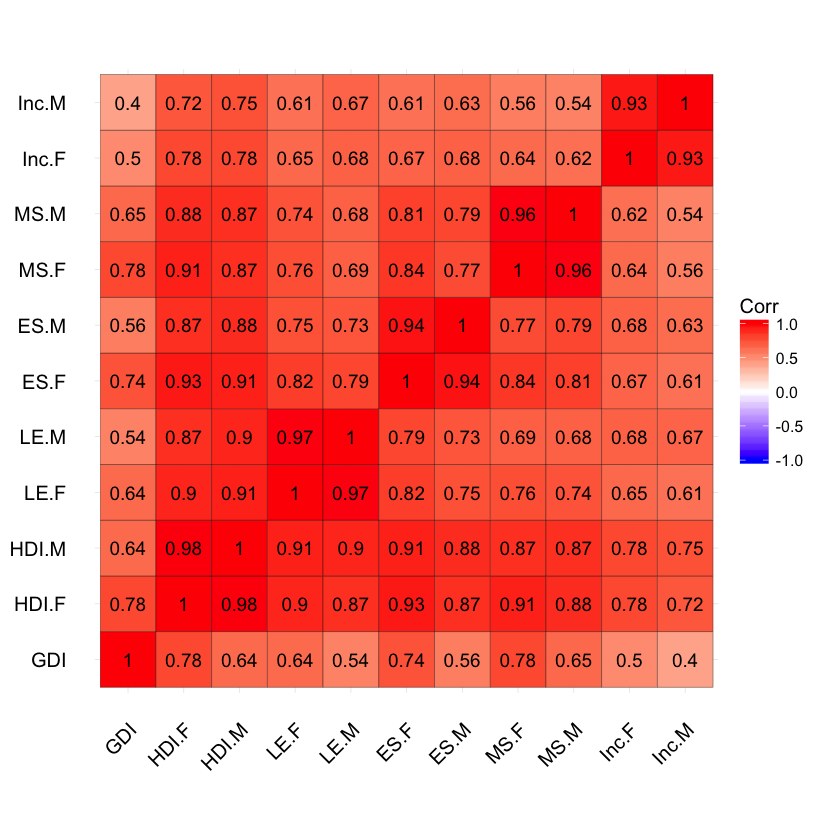

In [249]:
corr <- round(cor(d[,3:13]), 2)
ggcorrplot(corr, lab=TRUE, outline.col='black')

<h1>PCA</h1>

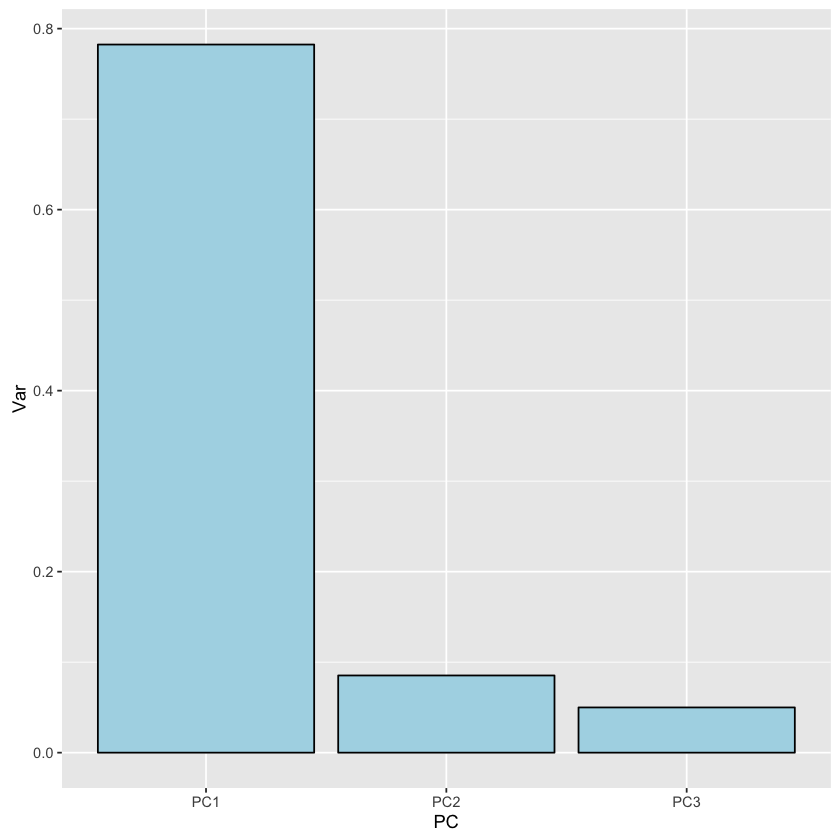

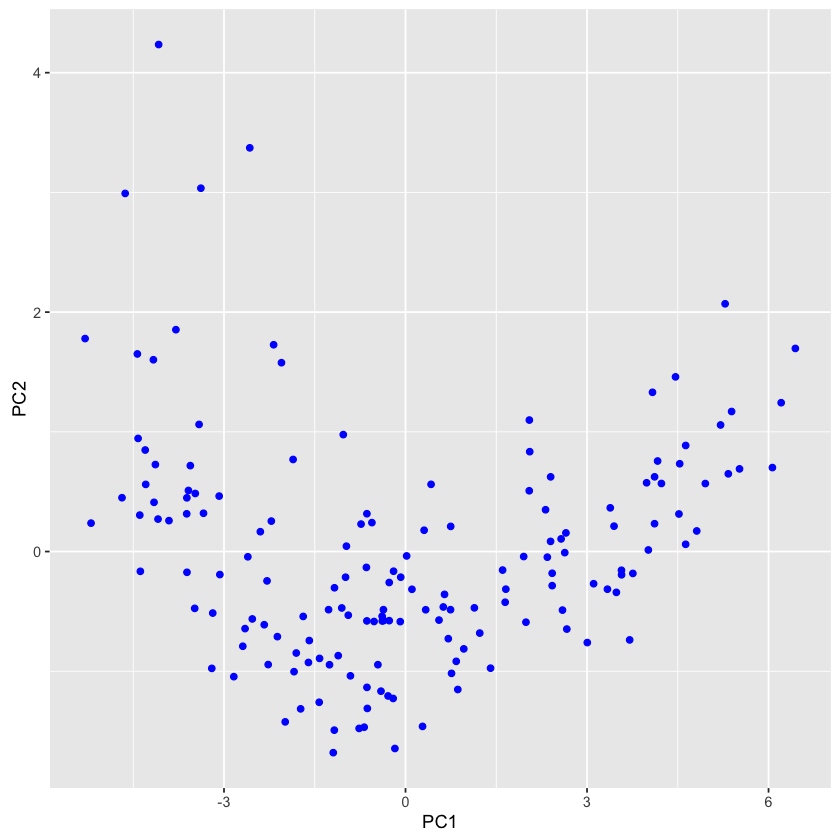

In [282]:
hdi_pca <- prcomp(d[,3:13], center=T, scale=T)
pc_var <- hdi_pca$sdev^2 / sum(hdi_pca$sdev^2)
pc_df <- data.frame(c('PC1', 'PC2', 'PC3'), pc_var[0:3])
colnames(pc_df) <- c('PC', 'Var')
PC1 <- data.frame(hdi_pca$x[,1])
PC2 <- data.frame(hdi_pca$x[,2])

ggplot(data=pc_df, aes(x=PC, y=Var)) +
    geom_bar(stat='identity', color='black', fill='light blue')

ggplot(data=data.frame(hdi_pca$x), aes(x=PC1, y=PC2)) +
    geom_point(stat='identity', color='blue')

<h1>HDI</h1>

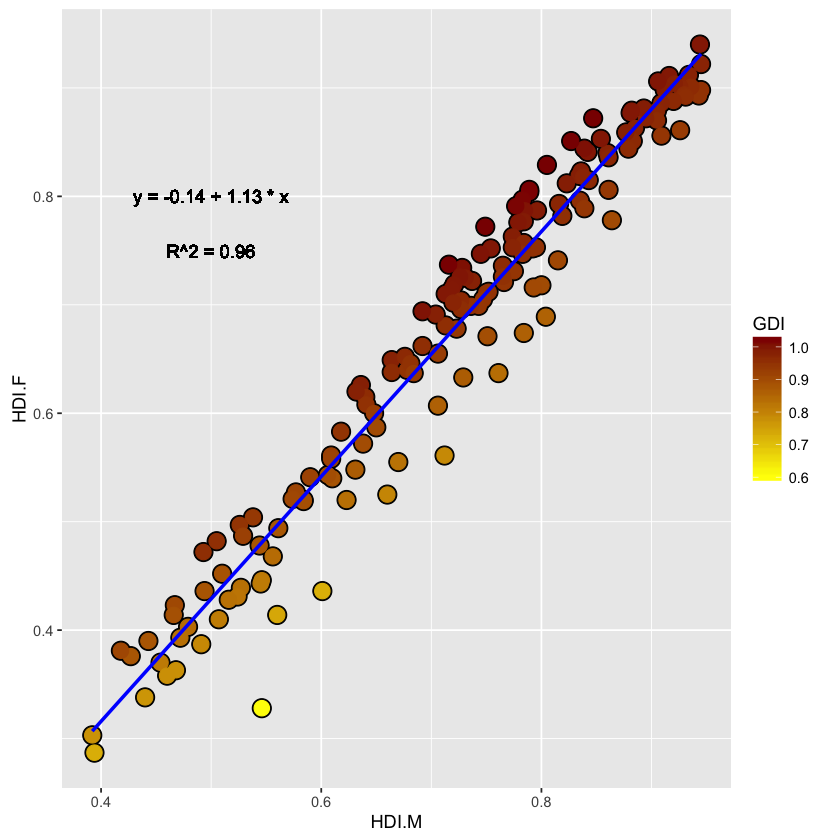

In [283]:
hdi_fit <- lm(d$HDI.F ~ d$HDI.M)

cf <- round(coefficients(hdi_fit),2)
regr_txt <- paste0('y = ', cf[1], ' + ', cf[2], ' * ', 'x')
r2 <- paste0('R^2 = ', round(summary(hdi_fit)$adj.r.squared,2))

ggplot(data=d, aes(x=HDI.M, HDI.F, color=GDI)) +
    scale_colour_gradient(low='yellow', high='red4') +
    geom_point(size=5, color='black') +
    geom_point(stat='identity', size=4) +
    geom_text(aes(x=0.5, y=0.8, label=regr_txt), color='black') +
    geom_text(aes(x=0.5, y=0.75, label=r2), color='black') +
    geom_smooth(method=lm, se=FALSE, color='blue')

<h1>Life Expectancy</h1>

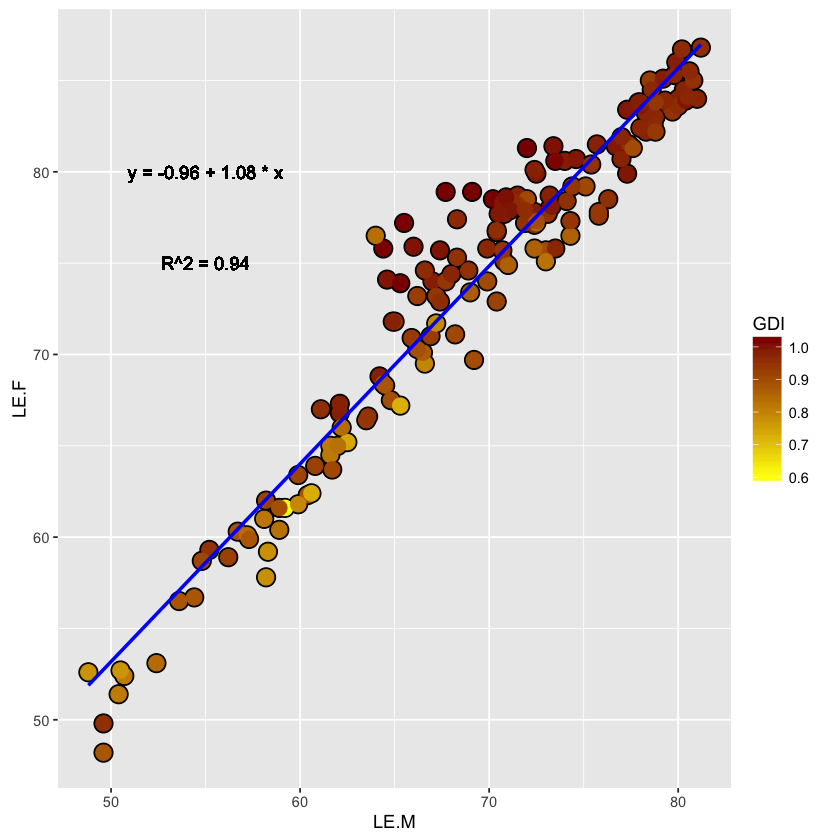

In [286]:
le_fit <- lm(d$LE.F ~ d$LE.M)

cf <- round(coefficients(le_fit),2)
regr_txt <- paste0('y = ', cf[1], ' + ', cf[2], ' * ', 'x')
r2 <- paste0('R^2 = ', round(summary(le_fit)$adj.r.squared,2))

ggplot(data=d, aes(x=LE.M, LE.F, color=GDI)) +
    scale_colour_gradient(low='yellow', high='red4') +
    geom_point(size=5, color='black') +
    geom_point(stat='identity', size=4) +
    geom_text(aes(x=55, y=80, label=regr_txt), color='black') +
    geom_text(aes(x=55, y=75, label=r2), color='black') +
    geom_smooth(method=lm, se=FALSE, color='blue')

<h1>Expected Years of Schooling</h1>

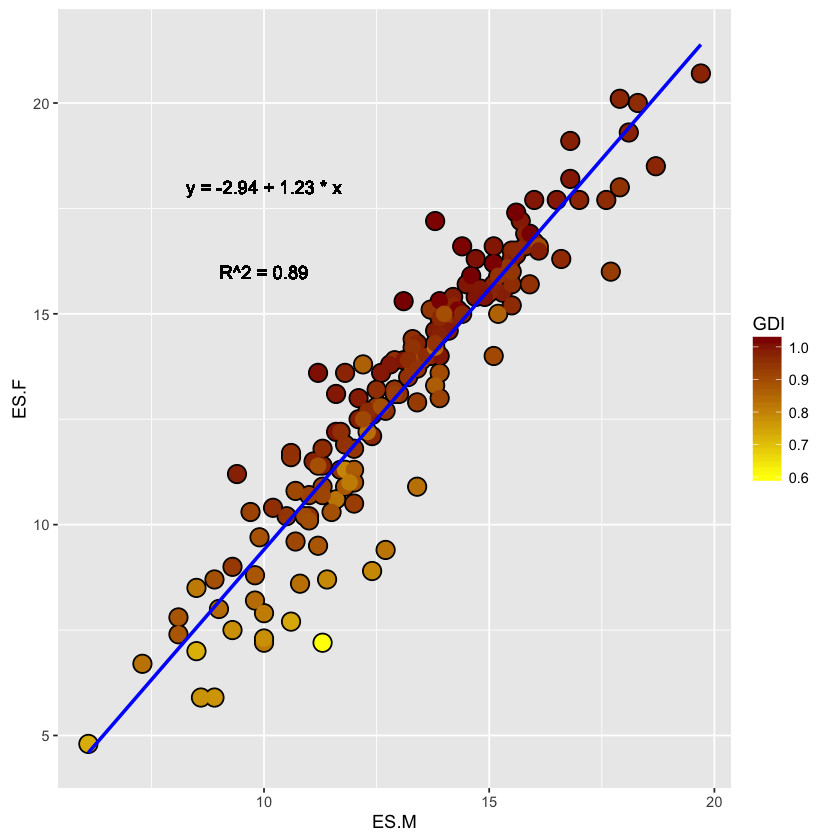

In [288]:
es_fit <- lm(d$ES.F ~ d$ES.M)

cf <- round(coefficients(es_fit),2)
regr_txt <- paste0('y = ', cf[1], ' + ', cf[2], ' * ', 'x')
r2 <- paste0('R^2 = ', round(summary(es_fit)$adj.r.squared,2))

ggplot(data=d, aes(x=ES.M, ES.F, color=GDI)) +
    scale_colour_gradient(low='yellow', high='red4') +
    geom_point(size=5, color='black') +
    geom_point(stat='identity', size=4) +
    geom_text(aes(x=10, y=18, label=regr_txt), color='black') +
    geom_text(aes(x=10, y=16, label=r2), color='black') +
    geom_smooth(method=lm, se=FALSE, color='blue')

<h1>Mean Years of Schooling</h1>

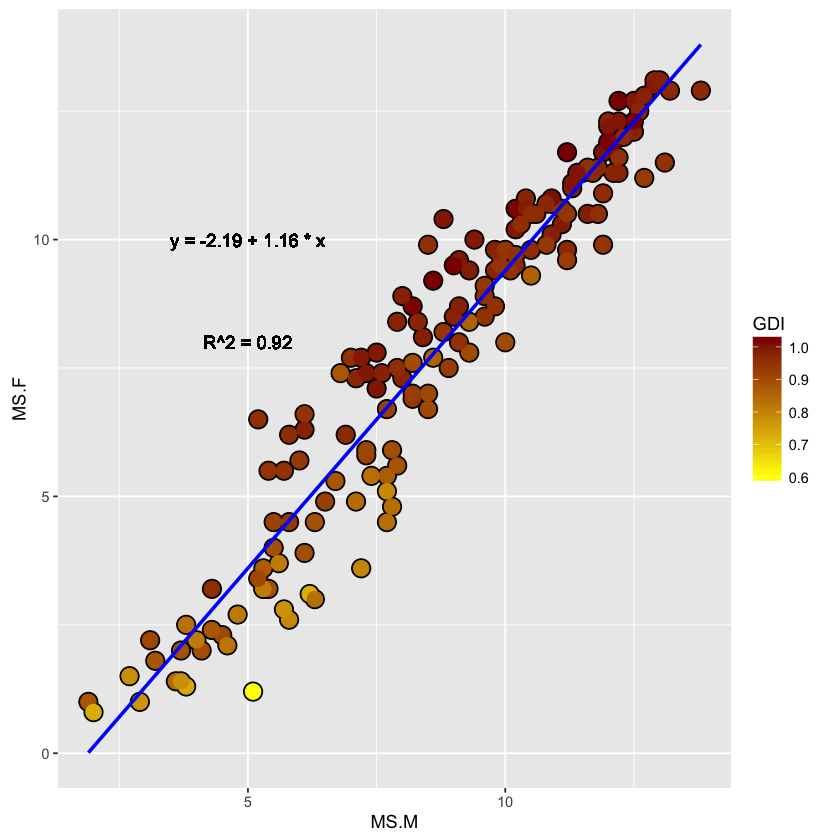

In [291]:
ms_fit <- lm(d$MS.F ~ d$MS.M)

cf <- round(coefficients(ms_fit),2)
regr_txt <- paste0('y = ', cf[1], ' + ', cf[2], ' * ', 'x')
r2 <- paste0('R^2 = ', round(summary(ms_fit)$adj.r.squared,2))

ggplot(data=d, aes(x=MS.M, MS.F, color=GDI)) +
    scale_colour_gradient(low='yellow', high='red4') +
    geom_point(size=5, color='black') +
    geom_point(stat='identity', size=4) +
    geom_text(aes(x=5, y=10, label=regr_txt), color='black') +
    geom_text(aes(x=5, y=8, label=r2), color='black') +
    geom_smooth(method=lm, se=FALSE, color='blue')

<h1>Income</h1>

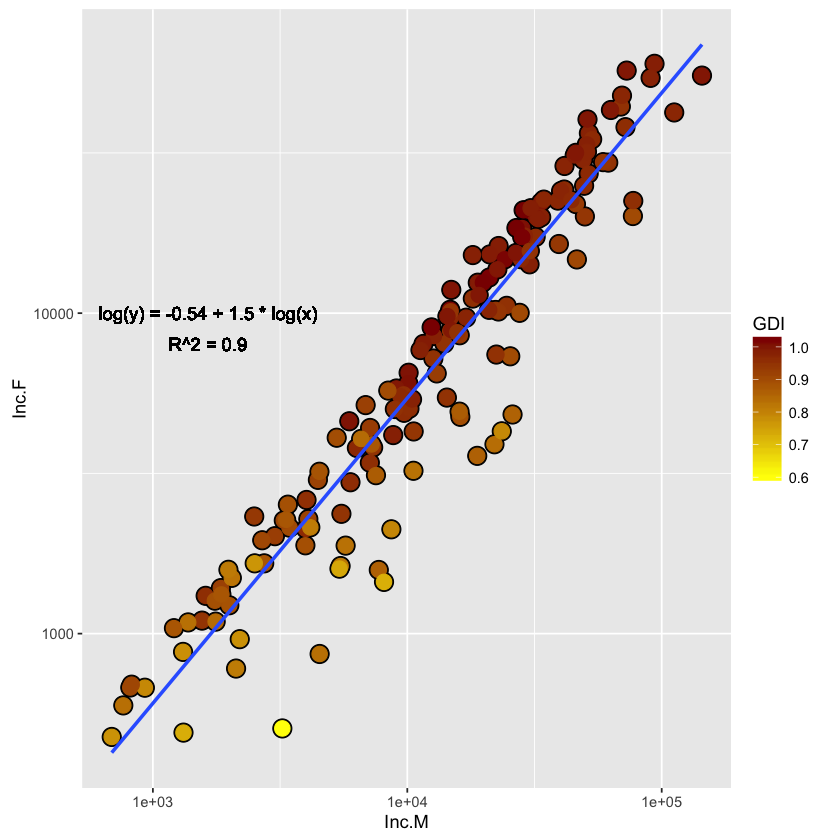

In [304]:
inc_fit <- lm(log10(d$MS.F) ~ log10(d$MS.M))

cf <- round(coefficients(inc_fit),2)
regr_txt <- paste0('log(y) = ', cf[1], ' + ', cf[2], ' * ', 'log(x)')
r2 <- paste0('R^2 = ', round(summary(inc_fit)$adj.r.squared,2))


ggplot(data=d, aes(x=Inc.M, Inc.F, color=GDI)) +
    scale_colour_gradient(low='yellow', high='red4') +
    geom_point(size=5, color='black') +
    geom_point(stat='identity', size=4) +
    scale_y_log10() +
    scale_x_log10() +
    geom_text(aes(x=1650, y=10000, label=regr_txt), color='black') +
    geom_text(aes(x=1650, y=8000, label=r2), color='black') +
    geom_smooth(method=lm, se=FALSE)